In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [24]:
!pip install torch

Load & Prepare Data

In [6]:
path = os.listdir('/kaggle/input/brain-tumor-classification-mri/Training/')
categories = {'no_tumor':0, 'pituitary_tumor':1}

In [7]:
x = []
y = []
for cls in categories:
    path1 = '/kaggle/input/brain-tumor-classification-mri/Training/'+cls
    for j in os.listdir(path1):
        img = cv2.imread(path1+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        x.append(img)
        y.append(categories[cls])

In [8]:
x = np.array(x)
y = np.array(y)
x_update = x.reshape(len(x),-1)

Analysis & Vis

In [9]:
np.unique(y)

array([0, 1])

In [10]:
pd.Series(y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [11]:
x.shape, x_update.shape

((1222, 200, 200), (1222, 40000))

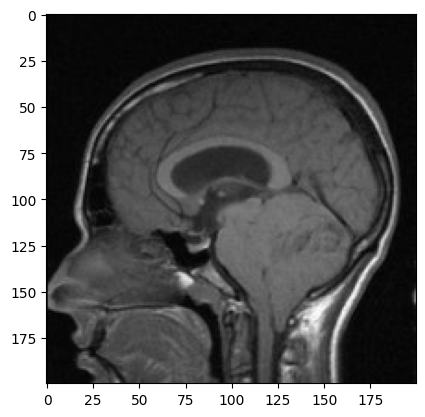

In [12]:
plt.imshow(x[0],cmap='gray')

Split data

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_update, y, random_state = 10, test_size=.20)

In [14]:
x_train.shape, x_test.shape

((977, 40000), (245, 40000))

In [15]:
y_train.shape, y_test.shape

((977,), (245,))

MinMax Scaling

In [16]:
print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())

x_train = x_train/255
x_test = x_test/255

print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


Model Training

In [17]:
svm_model = SVC()
history1 = svm_model.fit(x_train, y_train)
svm_model.fit(x_train,y_train)
svm_prediction = svm_model.predict(x_test)

In [18]:
print(svm_model.score(x_train,y_train))

0.9928352098259979


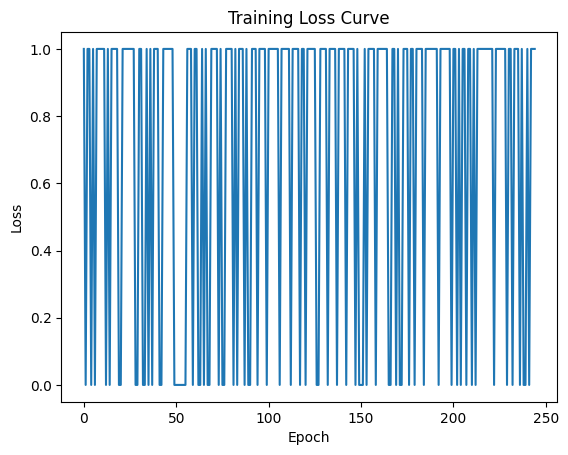

In [ ]:
svm_miss = np.where(y_test!=svm_prediction)
print(svm_miss)

In [ ]:
print('Total missclassified samples:',len(svm_miss[0]))
print(svm_prediction[3],y_test[3])
print('prediksinya 1, actualnya 0')

In [ ]:
print(metrics.classification_report(y_test,svm_prediction))
print(metrics.confusion_matrix(y_test,svm_prediction))
cm_svm = metrics.confusion_matrix(y_test,svm_prediction)
display_svm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_svm)
display_svm.plot()
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(x_train,y_train)
knn_prediction = knn_model.predict(x_test)

In [ ]:
print(knn_model.score(x_train,y_train))

In [ ]:
knn_miss = np.where(y_test!=knn_prediction)
print(knn_miss)

In [ ]:
print('Total missclassified samples:',len(knn_miss[0]))
print(knn_prediction[3],y_test[3])
print('prediksinya 1, actualnya 0')

In [ ]:
print(metrics.classification_report(y_test,knn_prediction))
print(metrics.confusion_matrix(y_test,knn_prediction))
cm_knn = metrics.confusion_matrix(y_test,knn_prediction)
display_knn = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_knn)
display_knn.plot()
plt.show()

EVALUATION

In [ ]:
print('Logistic Regression Accuracy : {:.2f}%'.format(metrics.accuracy_score(svm_prediction,y_test)*100))
print('KNN Accuracy : {:.2f}%'.format(metrics.accuracy_score(knn_prediction,y_test)*100))

USING TEST DATASET

In [ ]:
dec = {0:'no Tumor', 1:'Tumor'}

GLIOMA TUMOR FOLDER

In [ ]:
plt.figure(figsize=(12,8))
pathh = os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/')
c=1
for i in os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    svm_gliomapredict = svm_model.predict(img1)
    plt.title(dec[svm_gliomapredict[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

MENINGIOMA TUMOR FOLDER

In [ ]:
plt.figure(figsize=(12,8))
pathh = os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/')
c=1
for i in os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    svm_gliomapredict = svm_model.predict(img1)
    plt.title(dec[svm_gliomapredict[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

NO TUMOR FOLDER

In [ ]:
plt.figure(figsize=(12,8))
pathh = os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/')
c=1
for i in os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    svm_gliomapredict = svm_model.predict(img1)
    plt.title(dec[svm_gliomapredict[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

PITUITARY TUMOR FOLDER

In [ ]:
plt.figure(figsize=(12,8))
pathh = os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/')
c=1
for i in os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    svm_gliomapredict = svm_model.predict(img1)
    plt.title(dec[svm_gliomapredict[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1